In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [67]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Dropout(0.4))
classifier.add(Flatten())
classifier.add(Dense(units=32,activation='softmax'))
classifier.add(Dense(units=1,activation='sigmoid'))

In [68]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('train',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory('test',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)


Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [70]:
classifier.fit_generator(train_set,
                        steps_per_epoch=800, 
                        epochs = 200,
                        validation_data = test_set,
                        validation_steps = 20, 
                        #callbacks=[tensorboard]
                        );

Epoch 1/200
800/800 [==============================] - 2s 1ms/step - loss: 0.7001 - accuracy: 0.5003 - val_loss: 0.6959 - val_accuracy: 0.5000


In [71]:
classifier.save('dogcat_model.h5')

In [72]:
from tensorflow.keras.models import load_model
classifier = load_model('dogcat_model.h5')

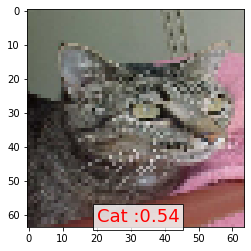

In [73]:
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('test/cats/104.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1 - prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()